In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chilakala","key":"30ff1a75d188a883fe44e75d877e5e18"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#! kaggle competitions download -c 'name-of-competition'
! kaggle datasets download -d 'chetankv/dogs-cats-images'

 98% 428M/435M [00:05<00:00, 66.1MB/s]
100% 435M/435M [00:06<00:00, 75.0MB/s]


In [7]:
import os
import zipfile

In [8]:
local_file='/content/dogs-cats-images.zip'
zip_ref=zipfile.ZipFile(local_file)

zip_ref.extractall('/content')
zip_ref.close()

In [9]:
base_dir='/content/dog vs cat'

train_dir='/content/dog vs cat/dataset/training_set'
test_dir='/content/dog vs cat/dataset/test_set'

train_cats_dir='/content/dog vs cat/dataset/training_set/cats'
train_dogs_dir='/content/dog vs cat/dataset/training_set/dogs'
test_cats_dir='/content/dog vs cat/dataset/test_set/cats'
test_dogs_dir='/content/dog vs cat/dataset/test_set/dogs'

In [10]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( test_cats_dir ) ))
print('total validation dog images :', len(os.listdir( test_dogs_dir ) ))

total training cat images : 4000
total training dog images : 4000
total validation cat images : 1000
total validation dog images : 1000


In [11]:
import tensorflow as tf
from tensorflow import keras


In [28]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(32,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(128,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Flatten(),
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dense(1,activation='sigmoid')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [31]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
'''
train_datagen=ImageDataGenerator(target_size=(150,150),
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 rotation_range=40,
                                 horizontal_flip=True,
                                 rescale=1/255,
                                 fill_mode='nearest')

                                 '''

"\ntrain_datagen=ImageDataGenerator(target_size=(150,150),\n                                 width_shift_range=0.2,\n                                 height_shift_range=0.2,\n                                 zoom_range=0.2,\n                                 rotation_range=40,\n                                 horizontal_flip=True,\n                                 rescale=1/255,\n                                 fill_mode='nearest')\n\n                                 "

In [33]:
train_gen=ImageDataGenerator(rescale=1/255)
test_gen=ImageDataGenerator(1/255)

train_generator=train_gen.flow_from_directory(train_dir,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode='binary')

test_generator=test_gen.flow_from_directory(test_dir,
                                            target_size=(150,150),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [35]:
history=model.fit_generator(train_generator,validation_data=test_generator,epochs=20,verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


250/250 - 25s - loss: 0.6542 - accuracy: 0.6166 - val_loss: 82.0171 - val_accuracy: 0.5875
Epoch 2/20
250/250 - 25s - loss: 0.5564 - accuracy: 0.7201 - val_loss: 53.7509 - val_accuracy: 0.6870
Epoch 3/20
250/250 - 25s - loss: 0.5029 - accuracy: 0.7645 - val_loss: 82.3630 - val_accuracy: 0.6200
Epoch 4/20
250/250 - 25s - loss: 0.4560 - accuracy: 0.7886 - val_loss: 50.9093 - val_accuracy: 0.6990
Epoch 5/20
250/250 - 25s - loss: 0.4053 - accuracy: 0.8174 - val_loss: 86.7885 - val_accuracy: 0.6005
Epoch 6/20
250/250 - 24s - loss: 0.3508 - accuracy: 0.8491 - val_loss: 84.7301 - val_accuracy: 0.6815
Epoch 7/20
250/250 - 24s - loss: 0.3048 - accuracy: 0.8686 - val_loss: 118.3403 - val_accuracy: 0.6600
Epoch 8/20
250/250 - 24s - loss: 0.2594 - accuracy: 0.8889 - val_loss: 88.4904 - val_accuracy: 0.7230
Epoch 9/20
250/250 - 25s - loss: 0.2134 - accuracy: 0.9130 - val_loss: 111.4296 - val_accuracy: 0.6650
Epoch 10/20
250/250 - 24s - loss: 0.1713 - accuracy: 0.9325 - val_loss: 88.0671 - val_accur

<Figure size 432x288 with 0 Axes>

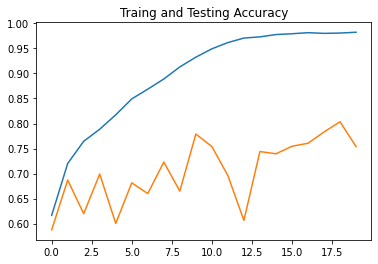

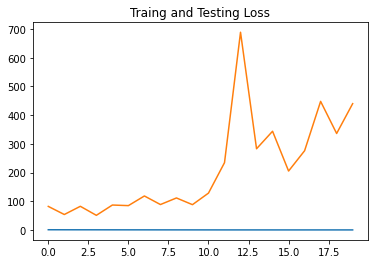

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt


acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


epochs=range(len(acc))

plt.plot(epochs,acc,label='Training_accuracy')
plt.plot(epochs,val_acc,label='Testing_accuracy')
plt.title('Traing and Testing Accuracy')
plt.figure()



plt.plot(epochs,loss,label='Training_loss')
plt.plot(epochs,val_loss,label='Testing_loss')
plt.title('Traing and Testing Loss')
plt.figure()


## As we see Model is Overfitting, so Now I am Implementing Dropout its one of the method of Regularization.

In [43]:
model1=keras.models.Sequential([
                               keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(32,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(128,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(256,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Flatten(),
                               keras.layers.Dropout(0.2),
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dense(1,activation='sigmoid')

])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [44]:
model1.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

In [45]:
train_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)

In [46]:
train_generator=train_gen.flow_from_directory(train_dir,
                                              class_mode='binary',
                                              target_size=(150,150),
                                              batch_size=32)

test_generator=test_gen.flow_from_directory(test_dir,
                                            class_mode='binary',
                                            target_size=(150,150),
                                            batch_size=32)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [47]:
history1=model1.fit_generator(train_generator,validation_data=test_generator,epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
250/250 [==============================] - 27s 104ms/step - loss: 0.6993 - accuracy: 0.5215 - val_loss: 0.6774 - val_accuracy: 0.5425
Epoch 2/20
250/250 [==============================] - 26s 102ms/step - loss: 0.6586 - accuracy: 0.6253 - val_loss: 0.6873 - val_accuracy: 0.5865
Epoch 3/20
250/250 [==============================] - 26s 102ms/step - loss: 0.5942 - accuracy: 0.6874 - val_loss: 0.5473 - val_accuracy: 0.7305
Epoch 4/20
250/250 [==============================] - 26s 103ms/step - loss: 0.5213 - accuracy: 0.7496 - val_loss: 0.4746 - val_accuracy: 0.7785
Epoch 5/20
250/250 [==============================] - 26s 102ms/step - loss: 0.4615 - accuracy: 0.7763 - val_loss: 0.4731 - val_accuracy: 0.7790
Epoch 6/20
250/250 [==============================] - 26s 102ms/step - loss: 0.4052 - accuracy: 0.8053 - val_loss: 0.4728 - val_accuracy: 0.7795
Epoch 7/20
250/250 [==============================] - 26s 103ms/step - loss: 0.3546 - accuracy: 0.8473 - val_loss: 0.4823 - val_ac

In [ ]:
history1.history

<Figure size 432x288 with 0 Axes>

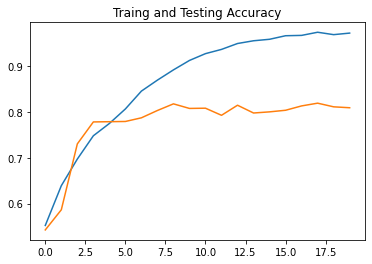

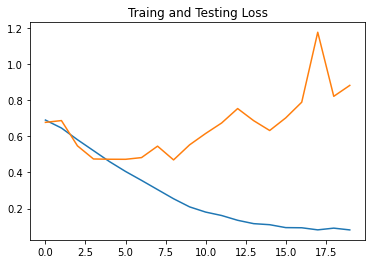

<Figure size 432x288 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt


acc= history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']


epochs=range(len(acc))

plt.plot(epochs,acc,label='Training_accuracy')
plt.plot(epochs,val_acc,label='Testing_accuracy')
plt.title('Traing and Testing Accuracy')
plt.figure()



plt.plot(epochs,loss,label='Training_loss')
plt.plot(epochs,val_loss,label='Testing_loss')
plt.title('Traing and Testing Loss')
plt.figure()


In [13]:
model2=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(128,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(128,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Flatten(),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dense(1,activation='sigmoid')

])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [20]:
model2.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [21]:
train_gen=ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_gen=ImageDataGenerator(rescale=1./255)

In [22]:
train_generator=train_gen.flow_from_directory(train_dir,
                                              class_mode='binary',
                                              target_size=(150,150),
                                              batch_size=20)

test_generator=test_gen.flow_from_directory(test_dir,
                                            class_mode='binary',
                                            target_size=(150,150),
                                            batch_size=20)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [24]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [25]:
history2=model2.fit_generator(train_generator,
                              validation_data=test_generator,
                              epochs=50
                              
                              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
400/400 [==============================] - 73s 181ms/step - loss: 0.7207 - accuracy: 0.5225 - val_loss: 0.6811 - val_accuracy: 0.5830
Epoch 2/50
400/400 [==============================] - 71s 178ms/step - loss: 0.6822 - accuracy: 0.5647 - val_loss: 0.6603 - val_accuracy: 0.6105
Epoch 3/50
400/400 [==============================] - 73s 181ms/step - loss: 0.6681 - accuracy: 0.6072 - val_loss: 0.6231 - val_accuracy: 0.6735
Epoch 4/50
400/400 [==============================] - 72s 181ms/step - loss: 0.6378 - accuracy: 0.6377 - val_loss: 0.6087 - val_accuracy: 0.6645
Epoch 5/50
400/400 [==============================] - 73s 181ms/step - loss: 0.6187 - accuracy: 0.6515 - val_loss: 0.5739 - val_accuracy: 0.7160
Epoch 6/50
400/400 [==============================] - 72s 181ms/step - loss: 0.6078 - accuracy: 0.6730 - val_loss: 0.5648 - val_accuracy: 0.7035
Epoch 7/50
400/400 [==============================] - 72s 181ms/step - loss: 0.5947 - accuracy: 0.6891 - val_loss: 0.5940 - val_ac

<Figure size 432x288 with 0 Axes>

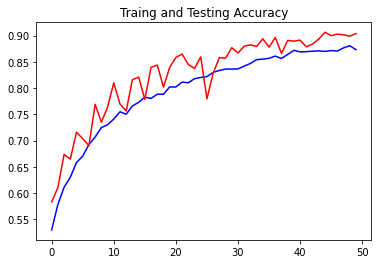

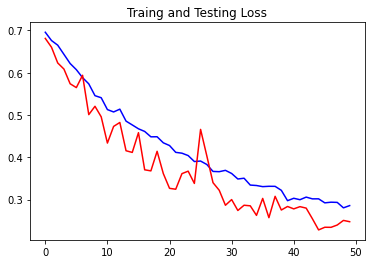

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt


acc= history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']


epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training_accuracy')
plt.plot(epochs,val_acc,'r',label='Testing_accuracy')
plt.title('Traing and Testing Accuracy')
plt.figure()



plt.plot(epochs,loss,'b',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Testing_loss')
plt.title('Traing and Testing Loss')
plt.figure()


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

## Transfer Learning


# **InceptionV3**

In [28]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [29]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [30]:
pre_trained_model=InceptionV3(input_shape=(150,150,3),
                              include_top=False,
                              weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [31]:
for layer in pre_trained_model.layers:
  layer.trainable=False

pre_trained_model.summary()


x=pre_trained_model.output
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(512,activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(1,activation='sigmoid')(x)

model3=keras.Model(inputs=pre_trained_model.input,outputs=x)
model3.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history3=model3.fit_generator(train_generator,validation_data=test_generator,epochs=20,verbose=2)



Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
400/400 - 85s - loss: 3.0438 - accuracy: 0.8715 - val_loss: 0.2049 - val_accuracy: 0.9415
Epoch 2/20
400/400 - 79s - loss: 0.3925 - accuracy: 0.9056 - val_loss: 0.1233 - val_accuracy: 0.9585
Epoch 3/20
400/400 - 78s - loss: 0.3033 - accuracy: 0.9109 - val_loss: 0.1262 - val_accuracy: 0.9525
Epoch 4/20
400/400 - 78s - loss: 0.2887 - accuracy: 0.9126 - val_loss: 0.1052 - val_accuracy: 0.9710
Epoch 5/20
400/400 - 78s - loss: 0.2743 - accuracy: 0.9176 - val_loss: 0.2245 - val_accuracy: 0.9440
Epoch 6/20
400/400 - 76s - loss: 0.2461 - accuracy: 0.9224 - val_loss: 0.0983 - val_accuracy: 0.9680
Epoch 7/20
400/400 - 77s - loss: 0.2437 - accuracy: 0.9196 - val_loss: 0.1019 - val_accuracy: 0.9670
Epoch 8/20
400/400 - 79s - loss: 0.2197 - accuracy: 0.9281 - val_loss: 0.1066 - val_accuracy: 0.9590
Epoch 9/20
400/400 - 79s - loss: 0.2401 - accuracy: 0.9273 - val_loss: 0.1099 - val_accuracy: 0.9630
Epoch 10/20
400/400 - 77s - loss: 0.2246 - accuracy: 0.9293 - val_loss: 0.1100 - val_accura

<Figure size 432x288 with 0 Axes>

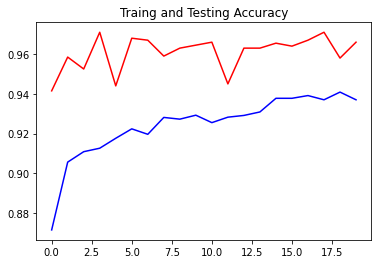

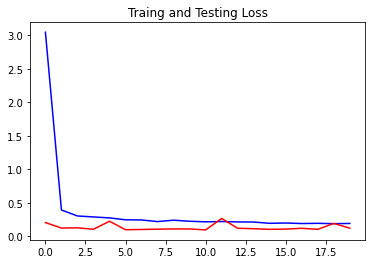

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt


acc= history3.history['accuracy']
val_acc=history3.history['val_accuracy']
loss=history3.history['loss']
val_loss=history3.history['val_loss']


epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training_accuracy')
plt.plot(epochs,val_acc,'r',label='Testing_accuracy')
plt.title('Traing and Testing Accuracy')
plt.figure()



plt.plot(epochs,loss,'b',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Testing_loss')
plt.title('Traing and Testing Loss')
plt.figure()


# **ReseNet50**

In [37]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model

In [39]:
pre_trained_model=ResNet50(input_shape=(150,150,3),
                              include_top=False,
                              weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable=False


In [42]:
pre_trained_model = keras.models.Sequential()


pre_trained_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
pre_trained_model.add(keras.layers.Dense(1, activation='sigmoid'))

#model4=keras.Model(inputs=pre_trained_model.input,outputs=x)
pre_trained_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history4=pre_trained_model.fit_generator(train_generator,validation_data=test_generator,epochs=20,verbose=2)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
400/400 - 159s - loss: 0.4632 - accuracy: 0.8901 - val_loss: 8.5042 - val_accuracy: 0.5000
Epoch 2/20
400/400 - 146s - loss: 0.2616 - accuracy: 0.9245 - val_loss: 0.2181 - val_accuracy: 0.9065
Epoch 3/20
400/400 - 147s - loss: 0.1671 - accuracy: 0.9419 - val_loss: 0.2172 - val_accuracy: 0.9555
Epoch 4/20
400/400 - 147s - loss: 0.1668 - accuracy: 0.9511 - val_loss: 0.7347 - val_accuracy: 0.9255
Epoch 5/20
400/400 - 147s - loss: 0.1492 - accuracy: 0.9561 - val_loss: 1.6947 - val_accuracy: 0.8770
Epoch 6/20
400/400 - 147s - loss: 0.1349 - accuracy: 0.9569 - val_loss: 0.1668 - val_accuracy: 0.9690
Epoch 7/20
400/400 - 146s - loss: 0.1198 - accuracy: 0.9609 - val_loss: 0.2162 - val_accuracy: 0.9670
Epoch 8/20
400/400 - 147s - loss: 0.1105 - accuracy: 0.9641 - val_loss: 1.2048 - val_accuracy: 0.9540
Epoch 9/20
400/400 - 147s - loss: 0.1153 - accuracy: 0.9653 - val_loss: 0.5494 - val_accuracy: 0.9595
Epoch 10/20
400/400 - 147s - loss: 0.1023 - accuracy: 0.9665 - val_loss: 0.2750 - 

<Figure size 432x288 with 0 Axes>

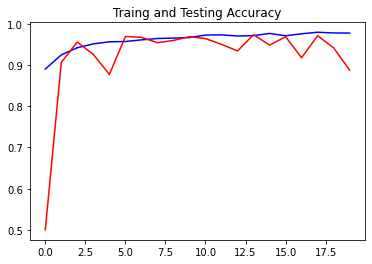

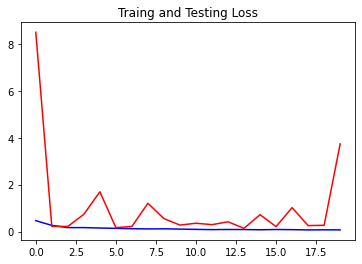

<Figure size 432x288 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt


acc= history4.history['accuracy']
val_acc=history4.history['val_accuracy']
loss=history4.history['loss']
val_loss=history4.history['val_loss']


epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training_accuracy')
plt.plot(epochs,val_acc,'r',label='Testing_accuracy')
plt.title('Traing and Testing Accuracy')
plt.figure()



plt.plot(epochs,loss,'b',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Testing_loss')
plt.title('Traing and Testing Loss')
plt.figure()


# **VGG16**

In [44]:
from tensorflow.keras.applications.vgg16 import VGG16

In [45]:
pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                          include_top = False,
                          weights = 'imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [46]:
for layer in pre_trained_model.layers:
  layer.trainable=False

#pre_trained_model.summary()


x=pre_trained_model.output
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(512,activation='relu')(x)
x=keras.layers.Dropout(0.5)(x)
x=keras.layers.Dense(1,activation='sigmoid')(x)

model5=keras.Model(inputs=pre_trained_model.input,outputs=x)

model5.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

model5.summary()


history5=model5.fit_generator(train_generator,validation_data=test_generator,epochs=20,verbose=2)



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


400/400 - 90s - loss: 0.4700 - accuracy: 0.7764 - val_loss: 0.3401 - val_accuracy: 0.8405
Epoch 2/20
400/400 - 87s - loss: 0.3792 - accuracy: 0.8274 - val_loss: 0.2557 - val_accuracy: 0.8950
Epoch 3/20
400/400 - 85s - loss: 0.3614 - accuracy: 0.8429 - val_loss: 0.2609 - val_accuracy: 0.8850
Epoch 4/20
400/400 - 85s - loss: 0.3555 - accuracy: 0.8466 - val_loss: 0.2822 - val_accuracy: 0.8830
Epoch 5/20
400/400 - 83s - loss: 0.3550 - accuracy: 0.8446 - val_loss: 0.2533 - val_accuracy: 0.8965
Epoch 6/20
400/400 - 84s - loss: 0.3390 - accuracy: 0.8545 - val_loss: 0.2472 - val_accuracy: 0.8980
Epoch 7/20
400/400 - 84s - loss: 0.3443 - accuracy: 0.8515 - val_loss: 0.2510 - val_accuracy: 0.8990
Epoch 8/20
400/400 - 84s - loss: 0.3355 - accuracy: 0.8516 - val_loss: 0.2814 - val_accuracy: 0.8885
Epoch 9/20
400/400 - 83s - loss: 0.3311 - accuracy: 0.8580 - val_loss: 0.2673 - val_accuracy: 0.8935
Epoch 10/20
400/400 - 83s - loss: 0.3339 - accuracy: 0.8562 - val_loss: 0.2967 - val_accuracy: 0.8860


<Figure size 432x288 with 0 Axes>

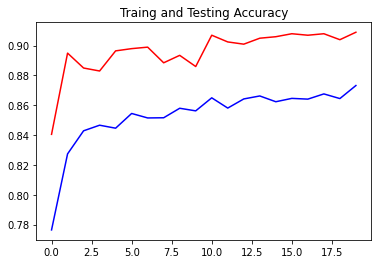

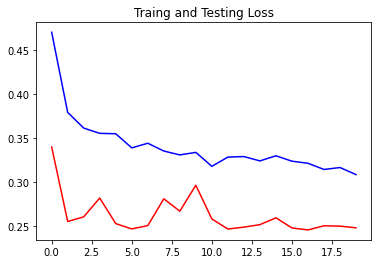

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt


acc= history5.history['accuracy']
val_acc=history5.history['val_accuracy']
loss=history5.history['loss']
val_loss=history5.history['val_loss']


epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training_accuracy')
plt.plot(epochs,val_acc,'r',label='Testing_accuracy')
plt.title('Traing and Testing Accuracy')
plt.figure()



plt.plot(epochs,loss,'b',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Testing_loss')
plt.title('Traing and Testing Loss')
plt.figure()
